# **Lending club EDA Case Study**:

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
loan_data = pd.read_csv('https://s3.us-east-2.amazonaws.com/upgraddocs/loan.csv')
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data understanding:

In [40]:
# No.of rows, columns
loan_data.shape

(39717, 111)

In [41]:
# fetch if there are any null columns that are present in the 
loan_data.info(verbose=True, null_counts=True)
# ===> there are 54 columns in which values are null and can be dropped.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null ob

In [42]:
# ===> Fetch unique columns in each columns
# ===> if we have columns with same value then we can rollout that columns
loan_data.describe(include='all').loc['unique', :]

id                                  NaN
member_id                           NaN
loan_amnt                           NaN
funded_amnt                         NaN
funded_amnt_inv                     NaN
term                                  2
int_rate                            371
installment                         NaN
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                          NaN
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                 NaN


In [43]:
#  analyse the column collections_12_mths_ex_med which has only two values 
# there only two values in the column collections_12_mths_ex_med which is 0 and NAN
loan_data['collections_12_mths_ex_med'].unique()

array([ 0., nan])

In [44]:
# ===> Policy has only one value
loan_data['policy_code'].unique()
# ===> It has only one value and correlation with other variables will be always 1 so we can remove it. 

array([1])

In [45]:
# ===> dti_joint has only one value
loan_data['dti_joint'].unique()
# ===> It has only one value and correlation with other variables will be always 1 so we can remove it. 

array([nan])

In [46]:
# ===> Term has two values 36 months, 60 months
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [47]:
loan_data['pymnt_plan'].unique()
# ===> It has only one value and correlation with other variables will be always 1 so we can remove it. 

array(['n'], dtype=object)

In [48]:
loan_data['initial_list_status'].unique()
# ===> It has only one value and correlation with other variables will be always 1 so we can remove it. 

array(['f'], dtype=object)

In [49]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [50]:
loan_data['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

#### Loan amount is distributed and we can't have any outliers as it's cash releated. 

In [51]:
loan_data['funded_amnt'].describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

#### Funded amount is distributed and we can't have any outliers as it's money releated. 

In [52]:
loan_data['int_rate'].describe()
# ===> interest rate is in string and it has % postfix so it can be removed and converted to string

count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object

In [53]:
loan_data['initial_list_status'].unique()
# ===> It has only one value and correlation with other variables will be always 1 so we can remove it. 

array(['f'], dtype=object)

In [54]:
loan_data['loan_status'].unique()
# ===> Loan status 3 values Fully Paid, Charged Off, Current
# ===> Charged off is defaulted custoemrs

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

### Data cleaning:

**Remove all null columns**

In [55]:
loan_data.dropna(how='all', inplace=True, axis='columns')
loan_data.shape

(39717, 57)

**Drop columns where there is only one value**

In [56]:
#======> remove the columns where there is only one value... it's correlation is always 1
loan_data.drop(columns=['policy_code', 'application_type', 'initial_list_status'], inplace=True)
loan_data.shape

(39717, 54)

In [57]:
# ===> Remove columns where there is only 0/NAN 
print(loan_data.tax_liens.unique())
loan_data.drop(columns=['tax_liens', 'chargeoff_within_12_mths'], inplace=True)
loan_data.shape

[ 0. nan]


(39717, 52)

In [58]:
print(loan_data.collections_12_mths_ex_med.unique())
loan_data.drop(columns=['collections_12_mths_ex_med'], inplace=True)
loan_data.shape

[ 0. nan]


(39717, 51)

##### Add column with defaulted who are charged off with 1/0

In [59]:
loan_data['defaulted'] = loan_data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,defaulted
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0,0,0.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,0,0.0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0,0,0.0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0,0,0.0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0,0,0.0,0


**Check if there are any columns with most of them null values which can be deleted**

In [60]:
total = loan_data.isnull().sum().sort_values(ascending=False)
percent = (loan_data.isnull().sum()/loan_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
next_pymnt_d,38577,0.971297
mths_since_last_record,36931,0.929854
mths_since_last_delinq,25682,0.646625
desc,12940,0.325805
emp_title,2459,0.061913
emp_length,1075,0.027066
pub_rec_bankruptcies,697,0.017549
last_pymnt_d,71,0.001788
revol_util,50,0.001259
title,11,0.000277


In [61]:
# There are 3 columns with most of them are null values which shown above can be removed.
loan_data.drop(columns=['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq'], inplace=True)
loan_data.shape

(39717, 49)

**Print meta about each columns which can be removed if there are any outliers**

In [62]:

for k in loan_data:
    print(k)
    print('-----------')
    print(loan_data[k].describe())
    print('-----------')

id
-----------
count    3.971700e+04
mean     6.831319e+05
std      2.106941e+05
min      5.473400e+04
25%      5.162210e+05
50%      6.656650e+05
75%      8.377550e+05
max      1.077501e+06
Name: id, dtype: float64
-----------
member_id
-----------
count    3.971700e+04
mean     8.504636e+05
std      2.656783e+05
min      7.069900e+04
25%      6.667800e+05
50%      8.508120e+05
75%      1.047339e+06
max      1.314167e+06
Name: member_id, dtype: float64
-----------
loan_amnt
-----------
count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
-----------
funded_amnt
-----------
count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
-----------
funded_amnt_inv
-----------
count    39717

In [63]:
# ====> From the above analysis we can get that there are columns with simply "0" as the value and can't have any effect
# ====> Can be removed from the dataset
print(loan_data['delinq_amnt'].unique())
loan_data.drop(columns=['acc_now_delinq'], inplace=True)
loan_data.drop(columns=['delinq_amnt'], inplace=True)
loan_data.shape

[0]


(39717, 47)

In [64]:
# ====> Remove columns
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'defaulted'],
      dtype='object')

### Data analysis

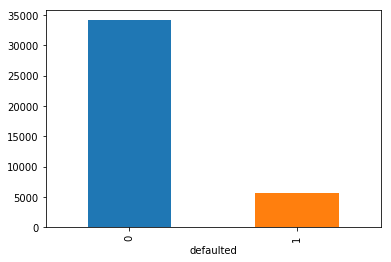

In [65]:
# ===> Defaulted vs FullyPaid/Currently paying customers 
loan_data.groupby('defaulted')['defaulted'].count().plot.bar()

In [66]:
loan_data['defaulted'].describe()

count    39717.000000
mean         0.141677
std          0.348723
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: defaulted, dtype: float64

#### Defaulted vs Grades bivariant for analysis:

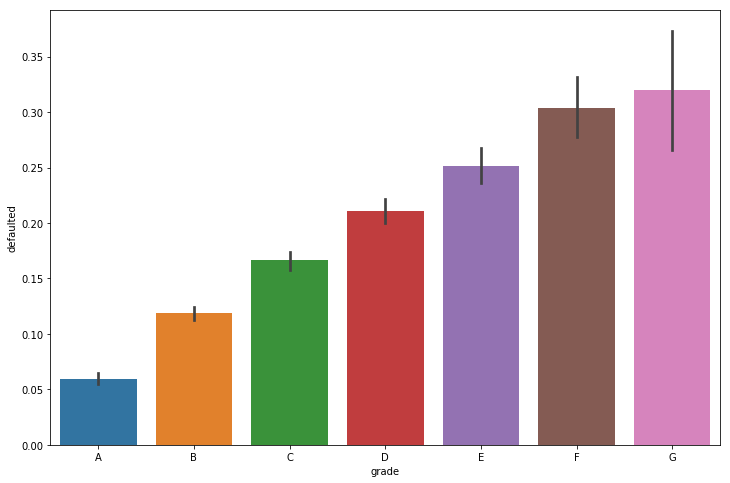

In [67]:
plt.figure(figsize=(12, 8))
order_grades = loan_data.groupby(["grade"])['defaulted'].aggregate(np.mean).reset_index().sort_values('defaulted')
sns.barplot(data=loan_data, y='defaulted', x='grade', order=order_grades['grade'])
plt.show()



* **Percentage of Defaulters are drwan above per grade**
* **High percentage of defaulters are in G with the order following from low as A, B, C, D, E, F, G with G being the highest**


#### Defaulted vs Sub grades bivariant for analysis:

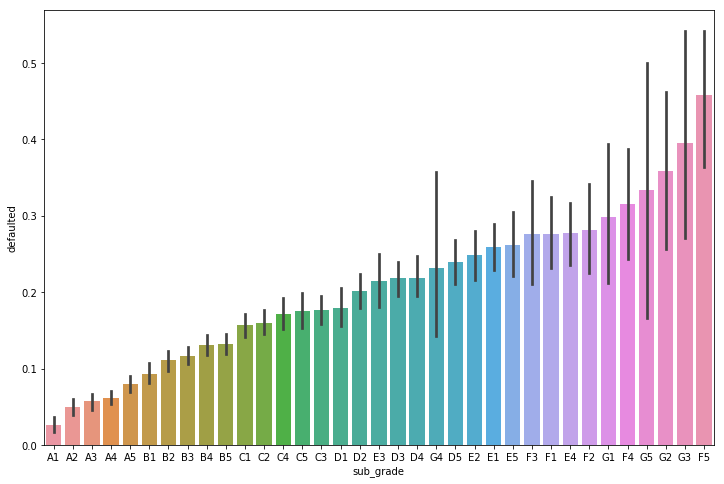

In [68]:
plt.figure(figsize=(12, 8))
order_sub_grades = loan_data.groupby(["sub_grade"])['defaulted'].aggregate(np.mean).reset_index().sort_values('defaulted')
sns.barplot(data=loan_data, y='defaulted', x='sub_grade', order=order_sub_grades['sub_grade'])
plt.show()


* **Percentage of Defaulters are drwan above per grade**
* **High percentage of defaulters are in F & G subgroups**


#### Defaulted vs Purpose of loan

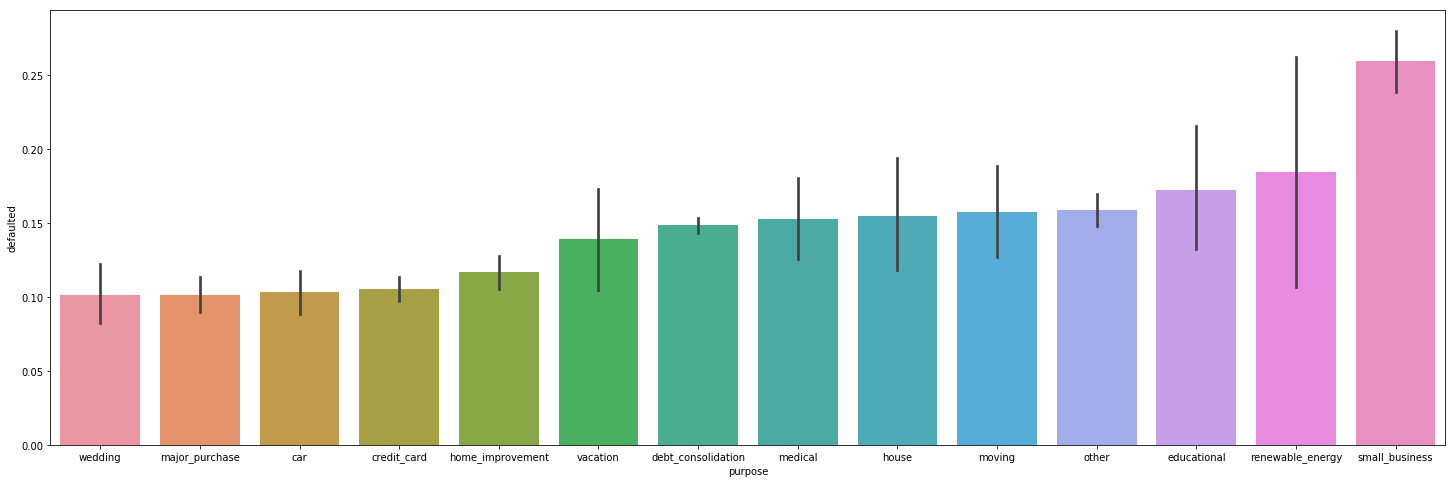

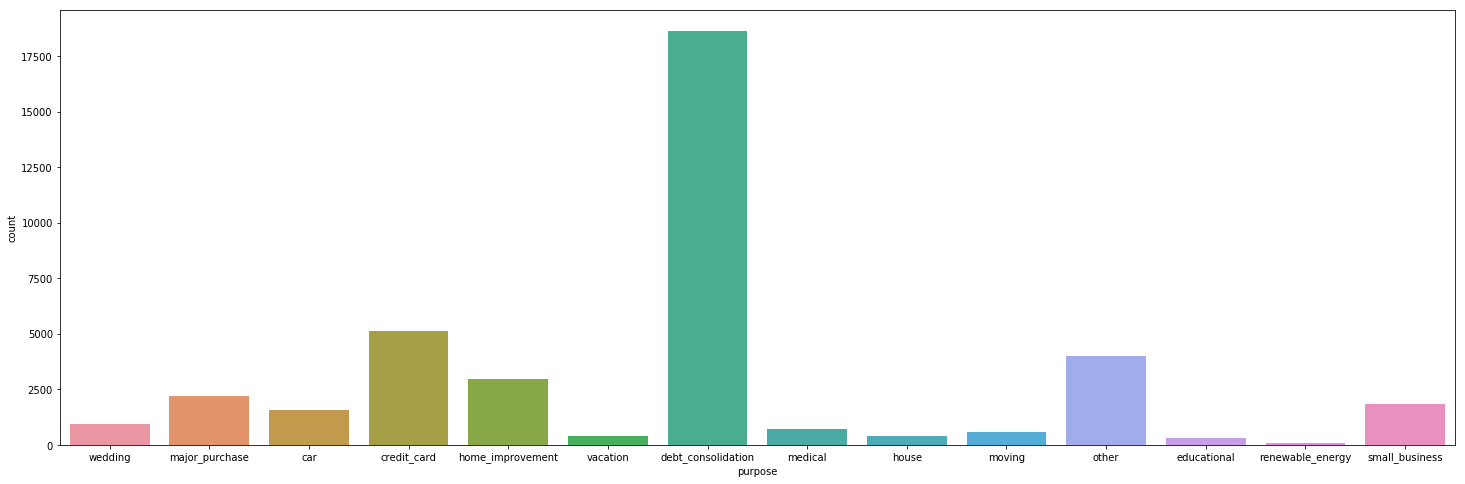

In [69]:
plt.figure(figsize=(25, 8))
order_business = loan_data.groupby('purpose').defaulted.aggregate(np.mean).reset_index().sort_values('defaulted')
sns.barplot(data=loan_data, y='defaulted', x='purpose', order=order_business['purpose'])
plt.show()

plt.figure(figsize=(25, 8))
sns.countplot(data=loan_data, x='purpose', order=order_business['purpose'])
plt.show()

* If you see the trend of the defaulters there are more people from educational, renewable energy & small business people present
* And with the reason as Other there is a huge no.of people and there is a high chanse of rejecting the loan if it's from the other purpose

#### Add year for the issue date to see if there are any relation with the year. 

In [70]:
loan_data.issue_d = pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data.loc[:, 'issue_year'] = loan_data.issue_d.dt.year

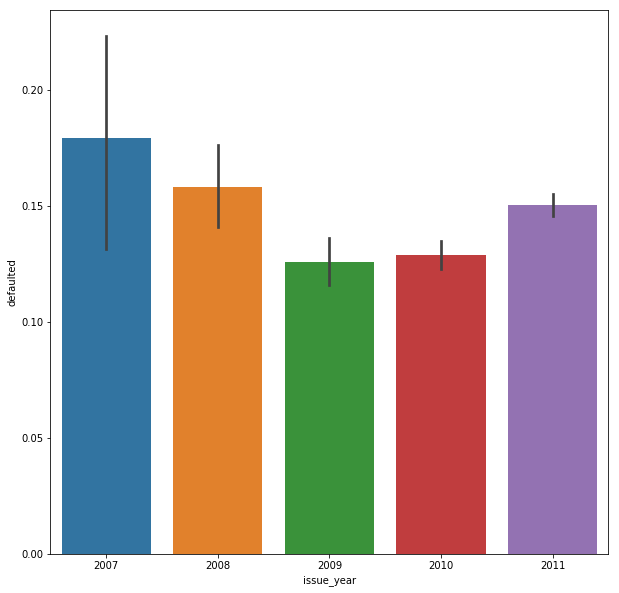

In [71]:
plt.figure(figsize=(10, 10))
sns.barplot(data=loan_data, y='defaulted', x='issue_year')
plt.show()

#### Extract proper percentage of interest from the string and remove %

In [72]:
loan_data.int_rate.replace('%', '', inplace=True, regex=True)
loan_data.int_rate.astype('float64')
loan_data.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: object

In [ ]:
loan_data['totalAmount'] = (loan_data['total_rec_prncp'] + loan_data['total_rec_int'] + loan_data['total_rec_late_fee'] + loan_data['recoveries']).round(2)
loan_data['total_pymnt'] = loan_data['total_pymnt'].round(2) 
print(loan_data['totalAmount'].unique())
print(loan_data['total_pymnt'].unique())